In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

# the splitting routines
import splitting as s

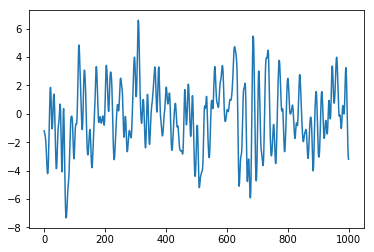

In [218]:
bias = 0
amplitude = 1
length = 1000
gauss1 = np.random.normal(bias,amplitude,length)
gauss2 = np.random.normal(bias,amplitude,length)

width = 3
smooth = signal.gaussian(length,width)

noise1 = np.convolve(gauss1, smooth,'same')
noise2 = np.convolve(gauss2, smooth,'same')
# plt.plot(gauss1)
plt.plot(noise1)
# plt.plot(smooth)

In [45]:
# calculate energy on noise1
E = np.sum(noise1**2)

# or using parsevals theorem
G1 = np.fft.fft(gauss1)
S1 = np.fft.fft(smooth)
S1 = np.pad(S1,(0,G1.size - S1.size),'constant')
# check convolution is the same as multiplication in Fourier domain
checkconv = np.real(np.fft.ifft(G1*S1))


G1.size
S1.size
# print(E)

1000

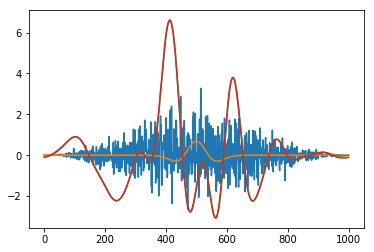

In [70]:
# check that convolution is the same as multiplication in the Fourier domain

a = np.random.normal(0,1,1000) * np.hanning(1000)
b = signal.ricker(1000,40)*5 * np.hanning(1000)
c = np.convolve(a,b,'same')
plt.plot(a)
plt.plot(b)
plt.plot(c)
A = np.fft.fft(a)
B = np.fft.fft(b)
C = np.roll(np.fft.ifft(A*B),500)
plt.plot(np.real(C))

# result:
# it is but you need to "roll" the answer by half the trace 
# length and use a taper to remove edge artefacts

In [192]:
# check Parseval's theorem holds numerically 
nsamps=1000
a = np.random.normal(0,1,nsamps) * signal.tukey(nsamps,0.05)
# b = signal.ricker(nsamps,40)*5 * signal.tukey(nsamps,.5)
# a = np.random.normal(0,1,nsamps) 
# b = signal.ricker(nsamps,40)*5 
# c = np.convolve(a,b,'same')
e = np.sum(a**2)

A = np.fft.fft(a)
# B = np.fft.fft(b)
C = np.absolute(A)
# multiply first and last samps by 0.5 before sum
# Ccoeff = np.ones(A.size)
E = np.sum(C**2)/C.size

print('time domain',e)
print('fourier domain',E)
print('difference',np.abs(e-E))
print('percent', (np.abs(e-E)/e)*100)

# conclusion yes it holds pretty well but don't 
# need to multiply first and last samps by 0.5
# as suggested in Walsh paper and do need to divide by number of samples
# to equalise results

# note the similarity in the form i prefer to the wiki


time domain 992.422485462
fourier domain 992.422485462
difference 2.27373675443e-13
percent 2.29109757965e-14


Parsevals theorem when applied to discrete Fourier Transform looks like this.

$\sum _{n=0}^{N-1}|x[n]|^{2}={\frac {1}{N}}\sum _{k=0}^{N-1}|X[k]|^{2}$

Source: https://en.wikipedia.org/wiki/Parseval%27s_theorem

(array([    4.,    32.,   198.,   891.,  2192.,  3069.,  2375.,   971.,
          235.,    33.]),
 array([-4.35233076, -3.56842243, -2.7845141 , -2.00060576, -1.21669743,
        -0.4327891 ,  0.35111924,  1.13502757,  1.91893591,  2.70284424,
         3.48675257]),
 <a list of 10 Patch objects>)

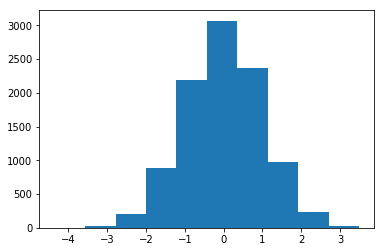

In [94]:
# histogram of noise -- is it gaussian? (should be it's synthetic!)
plt.hist(np.random.normal(0,1,10000))

In [213]:
def ndf(y,taper=False,detrend=False):
    """
    Uses the improvement found by Walsh et al (2013).
    By default will detrend data and taper the edges.
    """

    if taper is True:
        # taper edges to reduce transform artefacts
        y = y * signal.tukey(y.size,0.05)
        
    if detrend is True:
        # ensure no trend on the noise trace
        y = signal.detrend(y)

  
    Y = np.fft.fft(y)
    amp = np.absolute(Y)
    
    # estimate E2 and E4 following Walsh et al (2013)
    # note we do not scale the first and last samples by half before summing
    # as is done by Walsh following Silver and Chan.
    # this is because in practice we use a discrete fourier transform, 
    # and not a continuous transform for which the former approach would be correct.
    E2 = np.sum(amp**2) / Y.size
    E4 = (np.sum(4/3*amp**4)) / Y.size
    
    ndf = 2 * ( 2 * E2**2 / E4 - 1 )
    
    return ndf
    

In [214]:
# ndf(gauss1,taper=True,detrend=False)
y = np.interp(np.arange(gauss1.size*2),2*np.arange(gauss1.size),gauss1)
print(ndf(gauss1,taper=False,detrend=False))
print(ndf(gauss1,taper=False))
print(ndf(gauss1))
print(ndf(y))

-0.485468838391
-0.496786344008
-0.488322744218
-1.25886230954


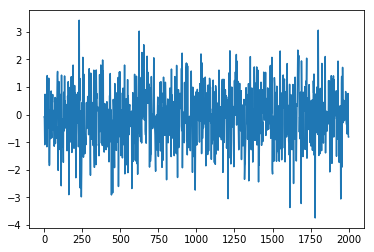

In [172]:
plt.plot(y)

In [209]:

E2 = (np.sum(C**2))
E4 = (np.sum(4/3*C**4))
e2 = E2/1000
e4 = E4/1000

def v(E2,E4):
    return 2 * ((2*E2**2/E4)-1)

print(v(E2,E4))
print(v(e2,e4))


1444.53992361
-0.553460076394


In [222]:
nsamps=1000
width=3
f = signal.gaussian(nsamps,width)
g = np.random.normal(0,1,nsamps)
n = np.convolve(f,g,'same')
F = np.fft.fft(f)
G = np.fft.fft(g)
N = np.fft.fft(n)

In [223]:
E = np.sum(F**2 * G**2) / nsamps

In [225]:
E
np.sum(n**2)

5215.8062994046295